In [28]:
import torch
import os
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [29]:
image_dir = 'C:\\Users\\Karthick Selvam\\Downloads\\PYTORCH\\contents\\Classification_dataset_v3\\images\\train'
for label, class_dir in enumerate(os.listdir(image_dir)):
  print(label, class_dir)

0 Cat
1 Dog
2 person


In [20]:
class ImageDataset(Dataset):
  def __init__(self, image_dir, transform=None):
    self.image_dir = image_dir
    self.image_paths = []
    self.labels = []
    self.class_name = {}
    self.transform = transform

    for label, class_dir in enumerate(os.listdir(image_dir)):
      self.class_name[label] = class_dir
      class_path = os.path.join(image_dir, class_dir)
      for img_name in os.listdir(class_path):
        self.image_paths.append(os.path.join(class_path, img_name))
        self.labels.append(label)

  def __len__(self):
    return len(self.image_paths)

  def __getitem__(self, idx):
    img_path = self.image_paths[idx]
    image = Image.open(img_path).convert("RGB")
    label = self.labels[idx]

    if self.transform:
      image = self.transform(image)

    return image, label

In [21]:
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()]
)

In [22]:
train_image_dir = 'C:\\Users\\Karthick Selvam\\Downloads\\PYTORCH\\contents\\Classification_dataset_v3\\images\\train'
test_image_dir = 'C:\\Users\\Karthick Selvam\\Downloads\\PYTORCH\\contents\\Classification_dataset_v3\\images\\test'

train_image_dataset = ImageDataset(image_dir=train_image_dir, transform=transform)
test_image_dataset = ImageDataset(image_dir=test_image_dir, transform=transform)

In [23]:
train_image_loader = DataLoader(dataset=train_image_dataset, batch_size=32, shuffle=True)
test_image_loader = DataLoader(dataset=test_image_dataset, batch_size=32, shuffle=True)

In [24]:
for images,labels in train_image_loader:
  print(images.shape, labels.shape)

torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([3

In [25]:
import matplotlib.pyplot as plt
import numpy as np

In [26]:
print(train_image_dataset.class_name)
print(test_image_dataset.class_name)

{0: 'Cat', 1: 'Dog', 2: 'person'}
{0: 'Cat', 1: 'Dog', 2: 'person'}


torch.Size([32, 3, 128, 128]) torch.Size([32])
(3, 128, 128)
Dog
(128, 128, 3)
1


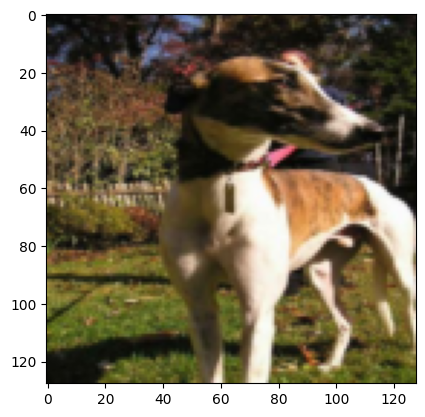

In [34]:
for images, labels in train_image_loader:
  print(images.shape, labels.shape)
  img = images[0].numpy()
  print(img.shape)
  label = labels[0].item()
  print(train_image_dataset.class_name[label])
  img = np.transpose(img, (1,2,0))
  print(img.shape)
  print(label)
  plt.imshow(img, vmin=0, vmax=255)
  break